<a href="https://colab.research.google.com/github/mueller14003/cse480-notebooks/blob/master/03_5_DFA_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First let's import, then look for the assignment below

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_

# Task 1: Define DFA Even010

<font size="4">    
Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of NON-OVERLAPPING occurrences of $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Hint: Name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and heed the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [5]:
Even010 = md2mc('''
DFA 

!! Put comments describing overall plan here
!! I am going to improvise and think it through as I am figuring it out, making revisions as I go.

IF : 1 -> IF
IF : 0 -> F0 !! 010 starts with 0 so move to new state
F0 : 1 -> F01 !! Getting close
F0 : 0 -> F0
F01 : 1 -> IF !! Reset since there wasn't a 0
F01 : 0 -> S !! Another 010, but now odd number of 010s
S : 1 -> S1
S : 0 -> S0 
S0 : 1 -> S01 !! Getting close
S0 : 0 -> S0
S1 : 1 -> S1
S1 : 0 -> S0
S01 : 1 -> S1 !! Reset since input was not 0
S01 : 0 -> IF !! Another 010, now even number of 010s
 
''')

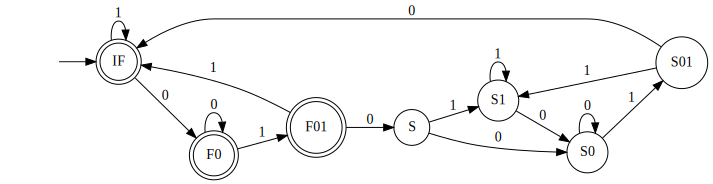

In [6]:
dotObj_dfa(Even010)

# Task 2: Define DFA Ends010

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Hint: Define a machine for "ends $010$" as illustrated by DFA Even010, and negate.

In [9]:
Ends010 =  md2mc('''
DFA

!! Put comments describing overall plan here
!! I am going to improvise and think it through as I am figuring it out, making revisions as I go.

I : 1 -> I
I : 0 -> S0
S0 : 1 -> S01
S0 : 0 -> S0
S01 : 1 -> I
S01 : 0 -> F
F : 0 -> S0
F : 1 -> S01

''')

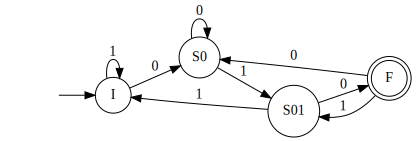

In [10]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

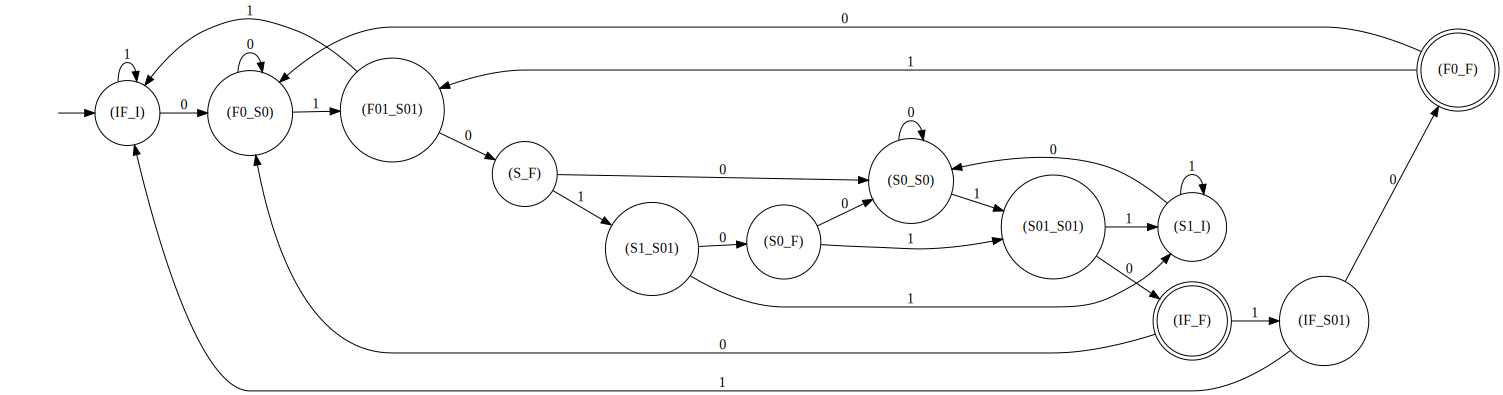

In [11]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

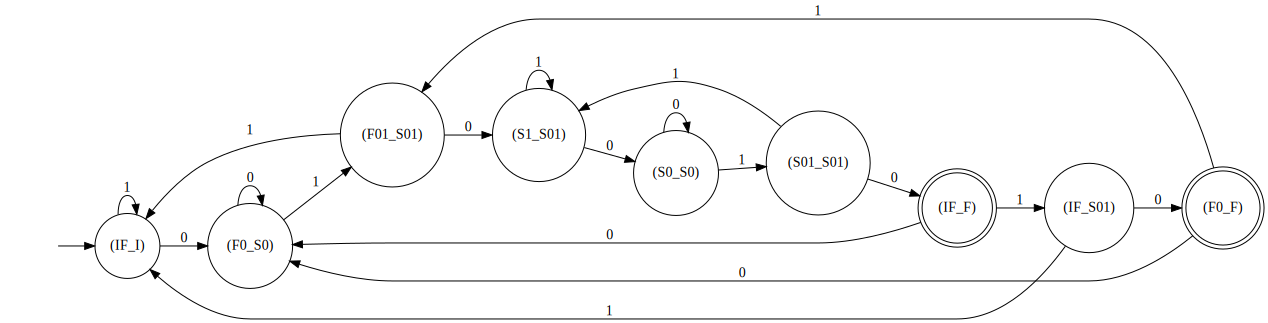

In [12]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Task 3: Examine Why Minimization Implies Elimination
<font size="4">    
    
Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [ ]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.

## Explain why it is OK to leave these states out

A template to guide your answer is below.

<font size="4"> 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * If there are multiple *SOMESTATE1* that are missing in DFA2, please pick the one that involves state letter 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 **IMPORTANT CHANGE:** __Due to some non-reproducibility lurking in Jove, some people may not get a state containing "I". In that case, pick any one state that is missing, and answer the remaining questions.__
 
 * But I find that THIS STRING (pick the shortest string in numeric order) that reached SOMESTATE1 in DFA1 is now reaching state SOMESTATE2 in DFA2
 
 * Thus I conclude that state SOMESTATE1 and SOMESTATE2 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   - upon 1, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   upon 01, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
 
 

 
 
    
</font>

# Testing the machine

In [ ]:
help(nthnumeric)

## Test the constructed machine the "direct" way

In [ ]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [ ]:
TestList

In [ ]:
help(accepts_dfa)

In [ ]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

## Use Python's "filter" function to filter out the accepted strings directly

In [ ]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

## Doubled the testing range; now finding at least ten strings!

In [ ]:
...Your doubled list of filtered items here...

# END